In [1]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Sklearn Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


# Sklearn Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures


# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate
from sklearn.tree import export_graphviz

# Custom Module's
from wrangle import wrangle_zillow
from functions import remove_outliers, remove_columns

import warnings
warnings.filterwarnings("ignore")

# Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### Is Logerror higher for houses with higher tax value?

### is there a difference in log error for houses with the same size?

### is there a difference in log error for houses with more rooms than the median?

### is there a difference in log error for houses with more restrooms than the median?

### What is the min, max and median log error per county?

# Answer those questions through a mix of statistical tests and visualizations.

Categorical vs Continous Graph: <b>violinplot, box plot</b><br>
Continous vs Continous Graph: <b>scatter, relplot</b>

In [2]:
train, validate, split = wrangle_zillow()

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None) 

pd.reset_option("display.max_rows", "display.max_columns")

In [4]:
df = train

### Is Logerror(continous) higher for houses with higher tax value(continous)?

In [5]:
len(train), len(df)

(29262, 29262)

In [6]:
# Not split into train, val, test 
# Have not removed outliers 

In [7]:
df['median_tax_value'] = np.where(df.landtaxvaluedollarcnt > df.landtaxvaluedollarcnt.median(), 'large', 'small')

In [8]:
df.landtaxvaluedollarcnt.median()

216976.5

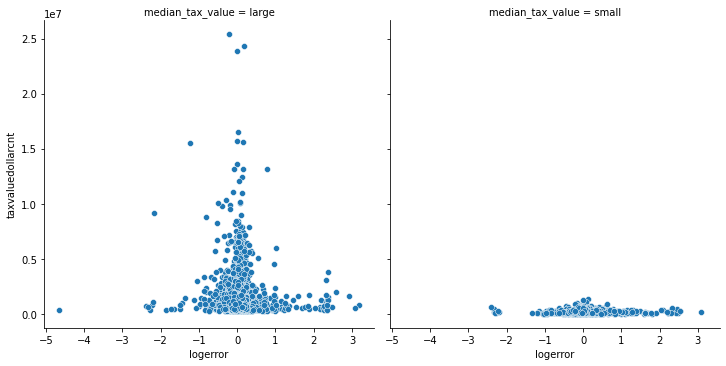

In [9]:
sns.relplot(data=df, y='taxvaluedollarcnt', x='logerror', col='median_tax_value')

In [10]:
df.landtaxvaluedollarcnt.min(), df.landtaxvaluedollarcnt.max()

(1000.0, 22335500.0)

In [11]:
df['median_tax_value'] = pd.cut(df.landtaxvaluedollarcnt, [0, 1_000_000, 2_000_000, 3_000_000, 4_000_000, 5_000_000])

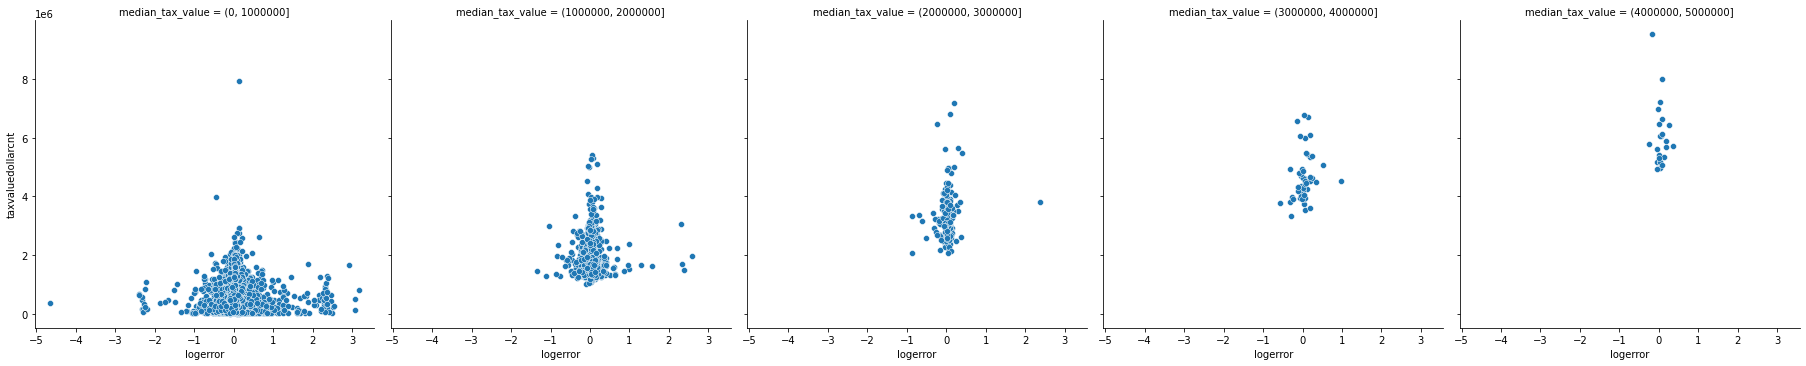

In [12]:
sns.relplot(data=df, y='taxvaluedollarcnt', x='logerror', col='median_tax_value')

In [13]:
# Takeaway
# - 0-1m has the largest logerror
# - 1m-2m has the second largest logerror
# - logerror seems to decrease while tax value increases.  

### is there a difference in log error for houses with the same size?

In [14]:
df['median_area'] = np.where(df.calculatedfinishedsquarefeet > df.calculatedfinishedsquarefeet.median(), 'large', 'small')

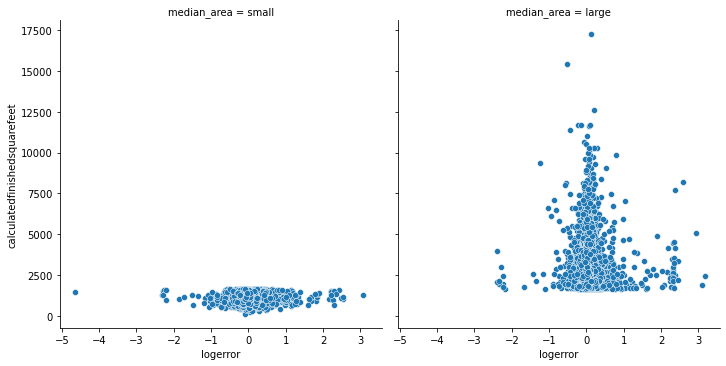

In [15]:
sns.relplot(data=df, y='calculatedfinishedsquarefeet', x='logerror', col='median_area')

In [16]:
df.calculatedfinishedsquarefeet.min(), df.calculatedfinishedsquarefeet.max()

(128.0, 17245.0)

In [17]:
df['median_area'] = pd.cut(df.calculatedfinishedsquarefeet, [0, 3_500, 7_000, 11_000, 22_000])

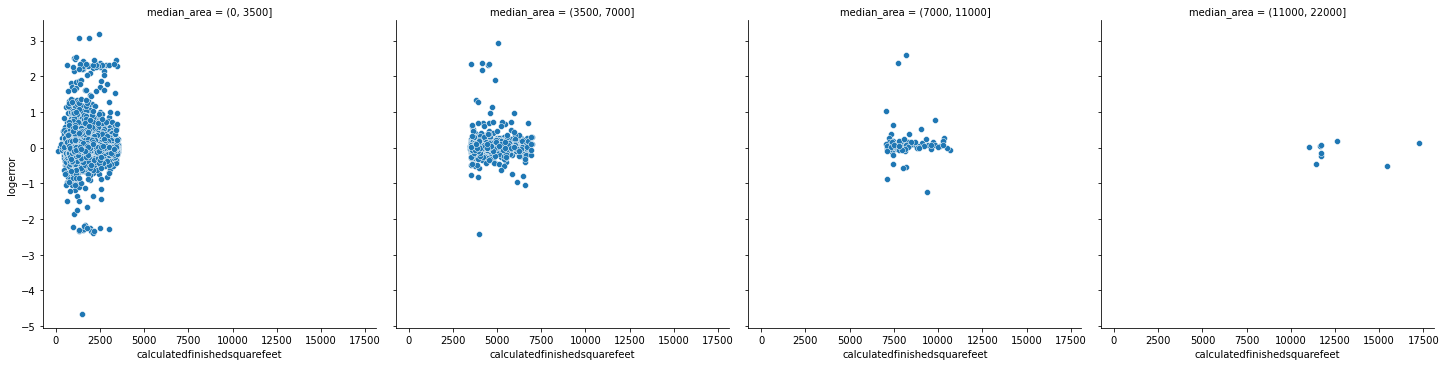

In [18]:
sns.relplot(data=df, x='calculatedfinishedsquarefeet', y='logerror', col='median_area')

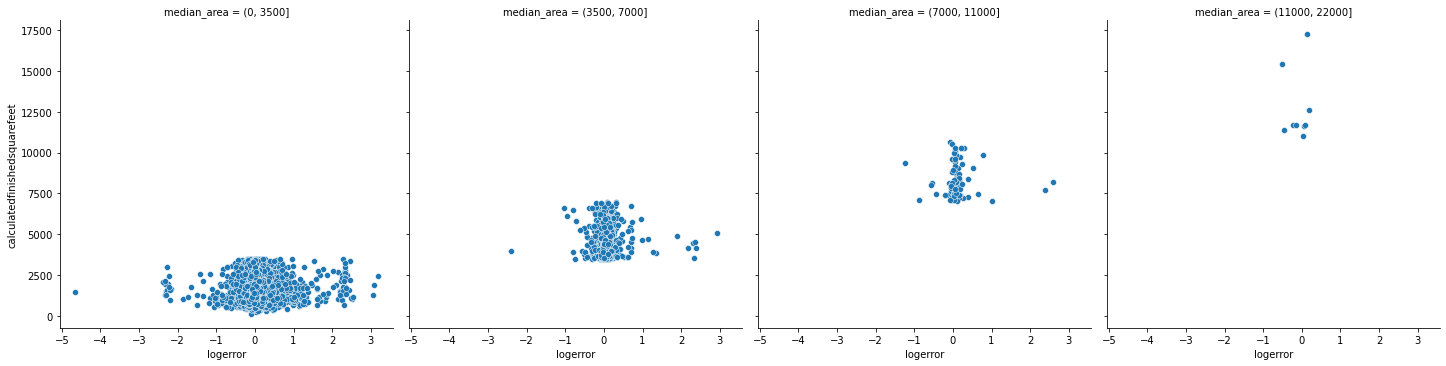

In [19]:
sns.relplot(data=df, y='calculatedfinishedsquarefeet', x='logerror', col='median_area')

In [20]:
# Takeaway
# - 0-3500 has the largest logerror
# - 3.5k-7k has the second largest logerror
# - logerror seems to decrease while area increases.

# is there a difference in log error for houses with more rooms than the median?

In [21]:
df['median_bed'] = np.where(df.bedroomcnt > df.bedroomcnt.median(), 'large', 'small')

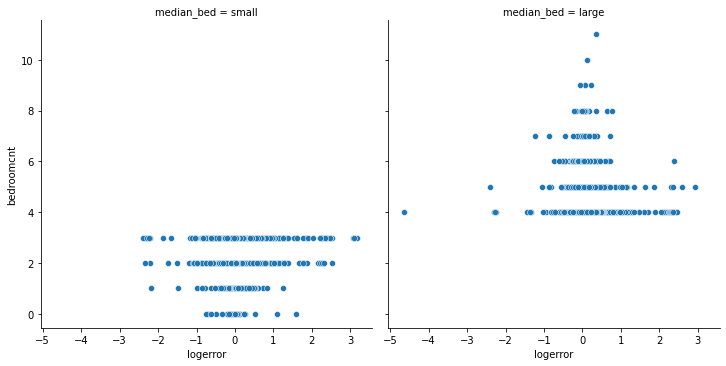

In [22]:
sns.relplot(data=df, y='bedroomcnt', x='logerror', col='median_bed')

### What is the min, max and median log error per county?

In [23]:
df["county_name"] = df["fips"].map({6037: "Los Angeles", 6059: "Orange", 6111: "Ventura"})

In [24]:
df.groupby("county_name").logerror.mean()

county_name
Los Angeles    0.015585
Orange         0.026055
Ventura        0.011554
Name: logerror, dtype: float64

In [25]:
df.groupby("county_name").logerror.min()

county_name
Los Angeles   -4.655420
Orange        -2.406257
Ventura       -2.298627
Name: logerror, dtype: float64

In [26]:
df.groupby("county_name").logerror.max()

county_name
Los Angeles    3.175688
Orange         2.933328
Ventura        2.311174
Name: logerror, dtype: float64

In [27]:
k = 1.5

In [28]:
df.head()

,propertylandusetypeid,heatingorsystemtypeid,parcelid,transactiondate,id,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,heatingorsystemdesc,propertylandusedesc,median_tax_value,median_area,median_bed,county_name
74001,261.0,7.0,11739893,2017-09-06,869774,2.0,3.0,4.0,2.0,1393.0,1393.0,6037.0,2.0,34042719.0,-118350812.0,5546.0,0100,LARD1.5,6.037218e+07,12447.0,3101.0,96000.0,0.0,1.0,1925.0,62889.0,314467.0,2016.0,251578.0,4007.81,6.037218e+13,74233,0.192318,Floor/Wall,Single Family Residential,"(0, 1000000]","(0, 3500]",small,Los Angeles
77018,261.0,2.0,11297002,2017-09-18,2881166,3.0,3.0,8.0,3.0,1454.0,1454.0,6037.0,3.0,34686465.0,-118110299.0,7887.0,0100,LRRA 7000*,6.037901e+07,5534.0,3101.0,97318.0,0.0,1.0,1989.0,104023.0,130027.0,2016.0,26004.0,2410.40,6.037901e+13,77251,-0.008974,Central,Single Family Residential,"(0, 1000000]","(0, 3500]",small,Los Angeles
3290,261.0,2.0,14092216,2017-01-17,876271,2.0,3.0,6.0,2.0,1435.0,1435.0,6059.0,2.0,33770111.0,-118012046.0,6536.0,122,LAR1,6.059100e+07,34780.0,1286.0,96990.0,6.0,1.0,1963.0,92920.0,515000.0,2016.0,422080.0,6211.78,6.059100e+13,3305,-0.011508,Central,Single Family Residential,"(0, 1000000]","(0, 3500]",small,Orange
53339,261.0,2.0,12258236,2017-07-03,2467194,2.0,3.0,6.0,2.0,1377.0,1377.0,6037.0,2.0,33903804.0,-118272774.0,5006.0,0100,LCR1YY,6.037541e+07,118994.0,3101.0,96042.0,0.0,1.0,1964.0,146810.0,263031.0,2016.0,116221.0,3703.25,6.037541e+13,53548,0.024993,Central,Single Family Residential,"(0, 1000000]","(0, 3500]",small,Los Angeles
57926,261.0,7.0,11395803,2017-07-18,1196604,1.0,2.0,6.0,1.0,1102.0,1102.0,6037.0,1.0,33966692.0,-118334107.0,5877.0,0100,INR1YY,6.037601e+07,45888.0,3101.0,96137.0,0.0,1.0,1939.0,69000.0,353000.0,2016.0,284000.0,4822.78,6.037601e+13,58144,-0.061264,Floor/Wall,Single Family Residential,"(0, 1000000]","(0, 3500]",small,Los Angeles


In [29]:
# columns to drop

'propertylandusetypeid',
'heatingorsystemtypeid',
'parcelid',
'buildingqualitytypeid',
'finishedsquarefeet12',
'fullbathcnt',
'propertylandusedesc',
'id.1',
'assessmentyear',
'structuretaxvaluedollarcnt',
'roomcnt',
'regionidcity',
'regionidcounty',
'regionidzip',
'propertycountylandusecode',



('propertycountylandusecode',)

In [30]:
cols_to_remove = ['propertylandusetypeid', 'heatingorsystemtypeid', 'parcelid', 'buildingqualitytypeid',\
                  'finishedsquarefeet12', 'fullbathcnt', 'propertylandusedesc', 'id.1', 'assessmentyear',\
                  'structuretaxvaluedollarcnt', 'roomcnt', 'regionidcity', 'regionidcounty', 'regionidzip',\
                  'propertycountylandusecode', 'censustractandblock', 'landtaxvaluedollarcnt',\
                  'rawcensustractandblock', 'propertyzoningdesc', 'transactiondate', 'calculatedbathnbr', 'id','fips']

In [31]:
df = remove_columns(df, cols_to_remove)

In [32]:
df.head()

,id,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,unitcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,heatingorsystemdesc,median_tax_value,median_area,median_bed,county_name
74001,869774,2.0,3.0,1393.0,6037.0,34042719.0,-118350812.0,5546.0,1.0,1925.0,314467.0,4007.81,0.192318,Floor/Wall,"(0, 1000000]","(0, 3500]",small,Los Angeles
77018,2881166,3.0,3.0,1454.0,6037.0,34686465.0,-118110299.0,7887.0,1.0,1989.0,130027.0,2410.40,-0.008974,Central,"(0, 1000000]","(0, 3500]",small,Los Angeles
3290,876271,2.0,3.0,1435.0,6059.0,33770111.0,-118012046.0,6536.0,1.0,1963.0,515000.0,6211.78,-0.011508,Central,"(0, 1000000]","(0, 3500]",small,Orange
53339,2467194,2.0,3.0,1377.0,6037.0,33903804.0,-118272774.0,5006.0,1.0,1964.0,263031.0,3703.25,0.024993,Central,"(0, 1000000]","(0, 3500]",small,Los Angeles
57926,1196604,1.0,2.0,1102.0,6037.0,33966692.0,-118334107.0,5877.0,1.0,1939.0,353000.0,4822.78,-0.061264,Floor/Wall,"(0, 1000000]","(0, 3500]",small,Los Angeles


In [33]:
df.unitcnt.value_counts()

1.0    29247
2.0       15
Name: unitcnt, dtype: int64

In [34]:
len(df[df.unitcnt == 2.0])

15

In [35]:
df[df.unitcnt == 2.0].index

Int64Index([37908, 38549, 62549, 49233,  9509, 62073, 60466, 30260, 54913,
            73532,  7352, 38814,  1447, 21954,  2505],
           dtype='int64')

In [36]:
selRows = df[df.unitcnt == 2.0].index
df = df.drop(selRows, axis=0)

In [37]:
df.unitcnt.value_counts()

1.0    29247
Name: unitcnt, dtype: int64

In [38]:
df.heatingorsystemdesc.value_counts()

Central       21837
Floor/Wall     7052
Forced air      290
Solar            49
None             10
Baseboard         4
Gravity           2
Radiant           2
Yes               1
Name: heatingorsystemdesc, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29247 entries, 74001 to 52485
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            29247 non-null  int64   
 1   bathroomcnt                   29247 non-null  float64 
 2   bedroomcnt                    29247 non-null  float64 
 3   calculatedfinishedsquarefeet  29247 non-null  float64 
 4   fips                          29247 non-null  float64 
 5   latitude                      29247 non-null  float64 
 6   longitude                     29247 non-null  float64 
 7   lotsizesquarefeet             29247 non-null  float64 
 8   unitcnt                       29247 non-null  float64 
 9   yearbuilt                     29247 non-null  float64 
 10  taxvaluedollarcnt             29247 non-null  float64 
 11  taxamount                     29247 non-null  float64 
 12  logerror                      29247 non-nu

In [40]:
df.head()

,id,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,unitcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,heatingorsystemdesc,median_tax_value,median_area,median_bed,county_name
74001,869774,2.0,3.0,1393.0,6037.0,34042719.0,-118350812.0,5546.0,1.0,1925.0,314467.0,4007.81,0.192318,Floor/Wall,"(0, 1000000]","(0, 3500]",small,Los Angeles
77018,2881166,3.0,3.0,1454.0,6037.0,34686465.0,-118110299.0,7887.0,1.0,1989.0,130027.0,2410.40,-0.008974,Central,"(0, 1000000]","(0, 3500]",small,Los Angeles
3290,876271,2.0,3.0,1435.0,6059.0,33770111.0,-118012046.0,6536.0,1.0,1963.0,515000.0,6211.78,-0.011508,Central,"(0, 1000000]","(0, 3500]",small,Orange
53339,2467194,2.0,3.0,1377.0,6037.0,33903804.0,-118272774.0,5006.0,1.0,1964.0,263031.0,3703.25,0.024993,Central,"(0, 1000000]","(0, 3500]",small,Los Angeles
57926,1196604,1.0,2.0,1102.0,6037.0,33966692.0,-118334107.0,5877.0,1.0,1939.0,353000.0,4822.78,-0.061264,Floor/Wall,"(0, 1000000]","(0, 3500]",small,Los Angeles


In [41]:
df.heatingorsystemdesc.value_counts()

Central       21837
Floor/Wall     7052
Forced air      290
Solar            49
None             10
Baseboard         4
Gravity           2
Radiant           2
Yes               1
Name: heatingorsystemdesc, dtype: int64

In [42]:
selRows = df[(df.heatingorsystemdesc == 'Yes') | (df.heatingorsystemdesc == 'Gravity') |\
(df.heatingorsystemdesc == 'Radiant') | (df.heatingorsystemdesc == 'Baseboard')|\
(df.heatingorsystemdesc == 'None')| (df.heatingorsystemdesc == 'Solar')].index
df = df.drop(selRows, axis=0)

In [43]:
df.heatingorsystemdesc.value_counts()

Central       21837
Floor/Wall     7052
Forced air      290
Name: heatingorsystemdesc, dtype: int64

In [45]:
len(df)

29179

In [46]:
df.heatingorsystemdesc.value_counts()

Central       21837
Floor/Wall     7052
Forced air      290
Name: heatingorsystemdesc, dtype: int64